In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

In [2]:
rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [8, 6]

## Lorenz system

In [3]:
dt = 0.001
T = 50
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28

In [4]:
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

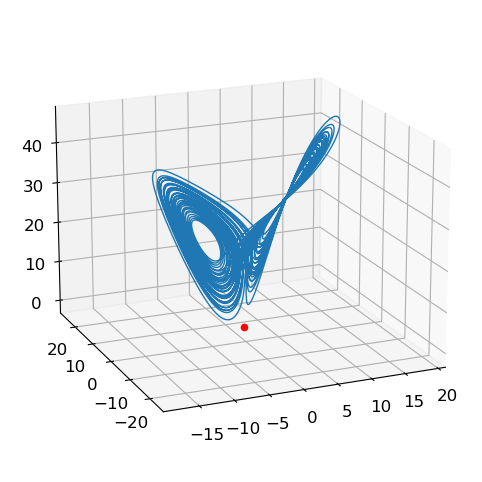

In [5]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})

np.random.seed(123)
x0 = (0,1,20)

x_t = integrate.odeint(lorenz_deriv, x0, t,rtol=10**(-12),atol=10**(-12)*np.ones_like(x0))

x, y, z = x_t.T
plt.plot(x, y, z,linewidth=1)
plt.scatter(x0[0],x0[1],x0[2],color='r')
             
ax.view_init(18, -113)
plt.show()

## Logistic System

In [6]:
startval = 1
endval = 4
xvals = np.array([[],[]])
n_iter = 1000
n_plot = 100

In [7]:
def logistic(xk,r):
    return r*xk*(1-xk)

In [8]:
for r in np.arange(startval,endval,0.00025):
    x = 0.5
    for i in range(n_iter):
        x = logistic(x,r)
        if i == n_iter-n_plot:
            xss = x
        if i > n_iter-n_plot:
            xvals = np.append(xvals,np.array([[r],[x]]),axis=1)
            if np.abs(x-xss) < 0.001:
                break

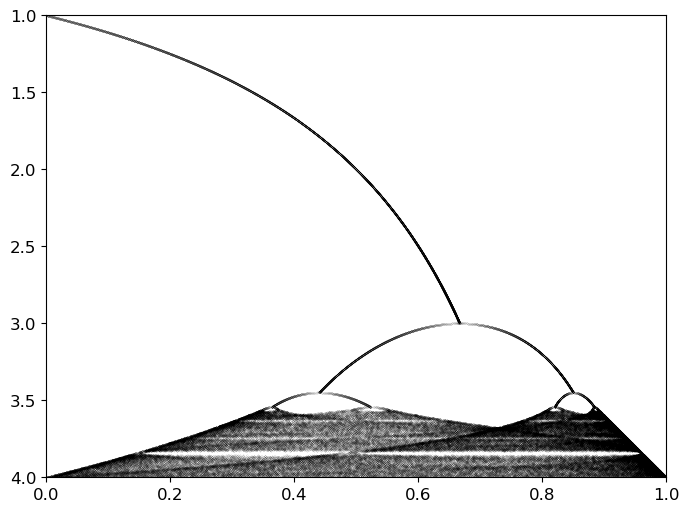

In [9]:
plt.plot(xvals[1,:],xvals[0,:],'.',ms=0.1,color='k')
plt.xlim(0,1)
plt.ylim(1,endval)
plt.gca().invert_yaxis()

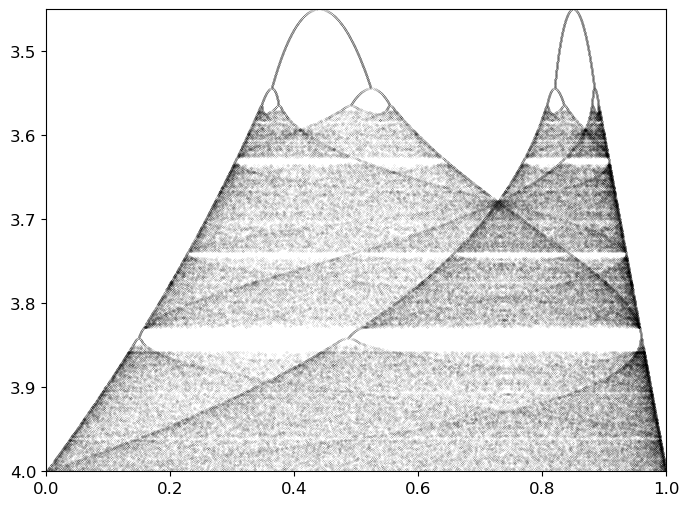

In [10]:
plt.plot(xvals[1,:],xvals[0,:],'.',ms=0.1,color='k')
plt.xlim(0,1)
plt.ylim(3.45,4)
plt.gca().invert_yaxis()